In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   429k      0  0:00:01  0:00:01 --:--:--  430k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [ ]:
!pip install geopandas 
!pip install contextily

In [ ]:
%matplotlib inline
import pandas as pd
import geopandas
import contextily
import geopandas as gpd
import xyzservices.providers as xyz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bike_areesosta = geopandas.read_file("/content/drive/MyDrive/bike_areesosta")
quartieri_milano = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm")
stradario = geopandas.read_file("/content/drive/MyDrive/stradario.csv")

In [ ]:
bike_areesosta

id_amat  ...                  geometry
0           2  ...  POINT (9.17821 45.42991)
1           4  ...  POINT (9.16829 45.51697)
2           8  ...  POINT (9.08480 45.47628)
3           9  ...  POINT (9.15673 45.48228)
4          10  ...  POINT (9.12054 45.45506)
...       ...  ...                       ...
1517     3232  ...  POINT (9.16586 45.50530)
1518     3233  ...  POINT (9.16628 45.50584)
1519     3234  ...  POINT (9.16634 45.50568)
1520     3235  ...  POINT (9.16633 45.50532)
1521     3243  ...  POINT (9.21895 45.43356)

[1522 rows x 12 columns]

In [ ]:
quartieri_milano

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [ ]:
stradario_sg=stradario.drop(['geometry'], axis=1)

In [ ]:
stradaario_sd=stradario_sg.drop_duplicates(subset=['CODICE_VIA'])

In [ ]:
stradaario_sd

CODICE_VIA AREA      DESCRIZIONE_VIA  ...  CAP SEZIONE MUNICIPIO
0           4377  VIA       8 OTTOBRE 2001  ...  138     916         4
1           3123  VIA          A.DEL SARTO  ...  129     665         3
27          3135  VIA    ABAMONTI GIUSEPPE  ...  129     113         3
30          2558  VIA                ABANO  ...  131    1565         3
41          1295  VIA      ABBA GIUSEPPE C  ...  158    1184         9
...          ...  ...                  ...  ...  ...     ...       ...
51220       5390  VIA              ZUCCARO  ...  146    1028         6
51226       1254  VIA      ZUCCOLI LUCIANO  ...  125    1608         2
51235       5302  VIA  ZUMBINI BONAVENTURA  ...  143    1008         6
51251       1216  VIA           ZURETTI G.  ...  125    1605         2
51306       6318  VIA               ZURIGO  ...  147    1082         7

[3954 rows x 8 columns]

# una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [ ]:
Aree_bici = pd.merge(bike_areesosta,stradaario_sd,  how="left" ,left_on="id_via" ,right_on="CODICE_VIA")
Aree_bici[["AREA","DESCRIZIONE_VIA","CIVICO","stalli_tot"]]

AREA  DESCRIZIONE_VIA CIVICO  stalli_tot
0     PZA    ABBIATEGRASSO      1          15
1     VLE           AFFORI      1          10
2     VIA  AIRAGHI GAETANO      3           5
3     VIA          ALCUINO      1           5
4     VIA         ALLODOLA      5           4
...   ...              ...    ...         ...
1517  VIA      CANDIANI G.      5          12
1518  VIA      CANDIANI G.      5          10
1519  VIA      CANDIANI G.      5          12
1520  VIA      CANDIANI G.      5          58
1521  VIA      SAN DIONIGI      1          30

[1522 rows x 4 columns]

# una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere


In [ ]:
Aree_bici_quart = geopandas.sjoin(Aree_bici, quartieri_milano , op='within', how='left')
Aree_bici_quart

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


id_amat id_via num_civico  ...   Shape_Leng    Shape_Area OBJECTID
0           2   5339          0  ...  8831.940397  3.232115e+06    148.0
1           4   1545         21  ...  6470.396969  2.070816e+06    158.0
2           8   6330         42  ...  6962.785127  1.645797e+06    100.0
3           9   7165          4  ...  3800.750663  9.096022e+05     91.0
4          10   6660          5  ...  8442.031660  2.644338e+06    176.0
...       ...    ...        ...  ...          ...           ...      ...
1517     3232   1242         72  ...  5740.970581  1.913060e+06    162.0
1518     3233   1242         72  ...  5740.970581  1.913060e+06    162.0
1519     3234   1242         72  ...  5740.970581  1.913060e+06    162.0
1520     3235   1242         72  ...  5740.970581  1.913060e+06    162.0
1521     3243   4290         36  ...  7108.599989  1.736689e+06    150.0

[1522 rows x 29 columns]

- i nomi dei quartieri in cui non ci sono aree di sosta;

In [ ]:
quart_non_areesosta = quartieri_milano[~quartieri_milano.intersects(bike_areesosta.unary_union)]
quart_non_areesosta

ID_NIL  ...                                           geometry
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
22      75  ...  POLYGON ((9.13009 45.50820, 9.13016 45.50784, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
48      31  ...  POLYGON ((9.27271 45.46079, 9.27276 45.46072, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
80      73  ...  POLYGON ((9.09928 45.53128, 9.09932 45.53118, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[12 rows x 9 columns]

- una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

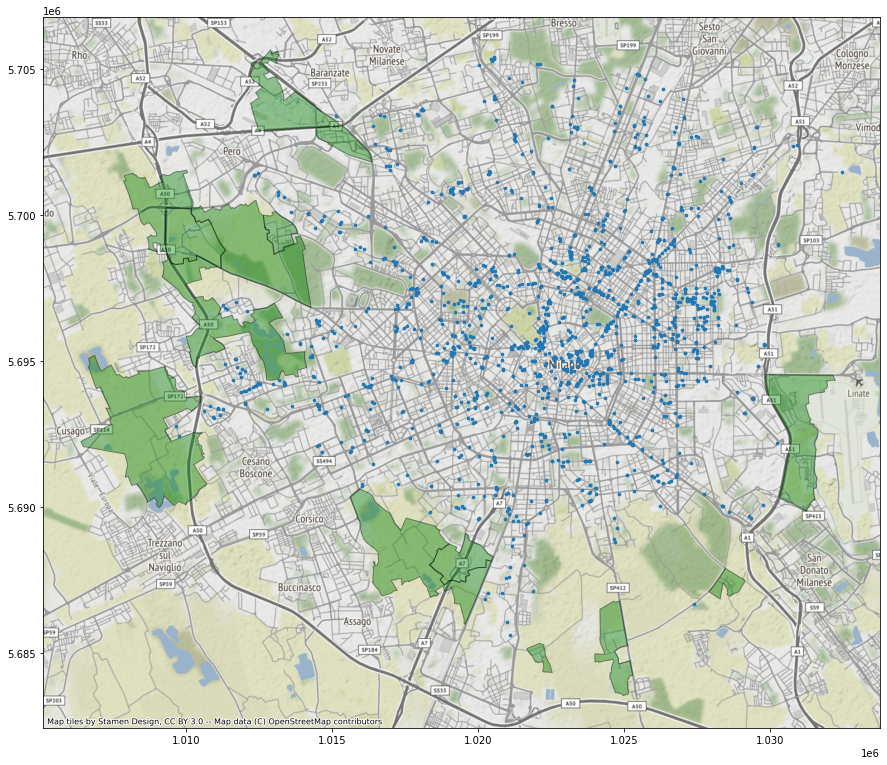

In [ ]:
ax = quart_non_areesosta.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "Green", alpha= 0.4, edgecolor= "k")
bike_areesosta.to_crs(epsg=3857).plot(ax=ax, markersize = 7)
contextily.add_basemap(ax)

- il nome del quartiere con più aree di sosta;

In [ ]:
groupby_el_qu = Aree_bici_quart.groupby("NIL").count()["geometry"].reset_index()

In [ ]:
quartiere_piu_aree = groupby_el_qu[groupby_el_qu["geometry"] == groupby_el_qu["geometry"].max()]
quartiere_piu_aree

NIL  geometry
17  DUOMO       136

In [ ]:
mergeDuo = pd.merge(quartieri_milano, quartiere_piu_aree, on= "NIL", how= "inner")
mergeDuo.rename(columns={"geometry_x": "geometry"}, inplace= True)

- una mappa di Milano con l'indicazione del quartiere con più aree di sosta;

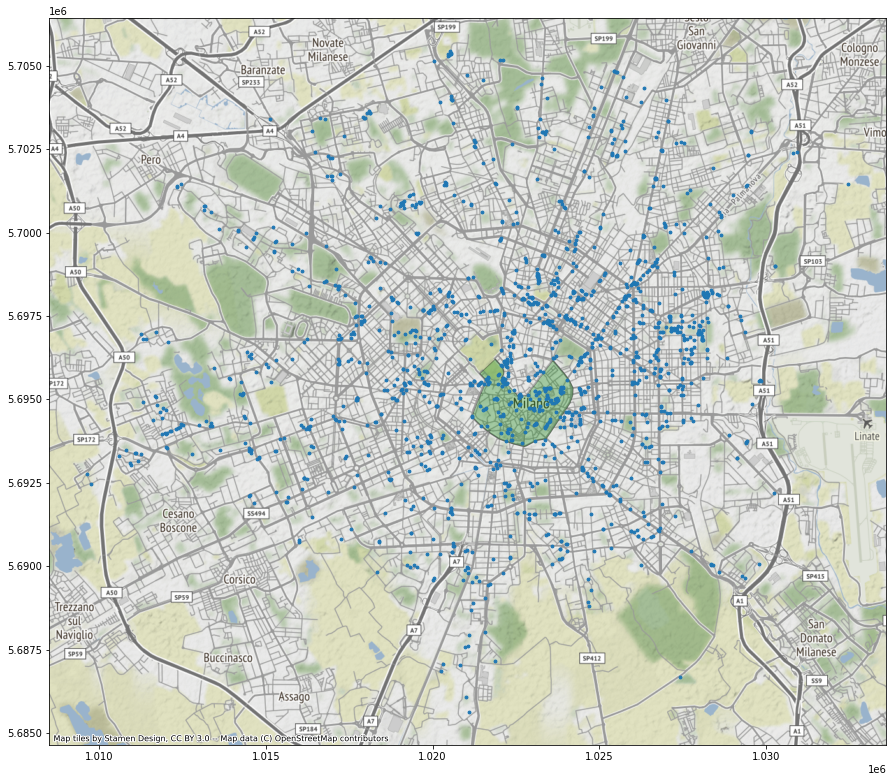

In [ ]:
ax = mergeDuo.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "Green", alpha= 0.3, edgecolor= "k")
bike_areesosta.to_crs(epsg=3857).plot(ax=ax, markersize = 8)
contextily.add_basemap(ax)

- i nomi dei quartieri con un numero di aree di sosta minori della media;

In [ ]:
quar_min_mean = groupby_el_qu[groupby_el_qu["geometry"] <  groupby_el_qu["geometry"].mean()]
quar_min_mean.reset_index()

index                                             NIL  geometry
0       0                                         ADRIANO         5
1       1                                          AFFORI        11
2       4                                          BARONA        14
3       7                                       BOVISASCA         5
4       9                                        BRUZZANO         9
5      11                 CIMIANO - ROTTOLE - Q.RE FELTRE        12
6      13                                        COMASINA         1
7      15                          DE ANGELI - MONTE ROSA        19
8      16                                         DERGANO        12
9      18                                          FARINI         4
10     20                                        GHISOLFA         3
11     21                                     GIAMBELLINO        10
12     22                           GIARDINI P.TA VENEZIA         8
13     24    GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE        10
14     25                                 GRECO - SEGNANO         6
15     28                               LAMBRATE - ORTICA        11
16     34                    MAGGIORE - MUSOCCO - CERTOSA         1
17     35                       MONCUCCO - SAN CRISTOFORO        10
18     36                                       MORIVIONE        17
19     37                                        MUGGIANO         2
20     39                                     ORTOMERCATO         3
21     40                    PADOVA - TURRO - CRESCENZAGO        17
22     42                             PARCO DELLE ABBAZIE         1
23     43                      PARCO FORLANINI - CAVRIANO         4
24     44                                      PARCO NORD         3
25     45                                  PARCO SEMPIONE         3
26     50                      PORTA TICINESE - CONCHETTA        19
27     51                PORTA VIGENTINA - PORTA LODOVICA        12
28     52                                        PORTELLO        18
29     53                                      PTA ROMANA        16
30     55                                            QT 8        14
31     56                                  QUARTO CAGNINO         5
32     57               QUARTO OGGIARO - VIALBA - MUSOCCO        16
33     58                                   QUINTO ROMANO         5
34     59                         ROGOREDO - SANTA GIULIA         3
35     60  RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO         6
36     61                                         ROSERIO         1
37     62                                        SAN SIRO        12
38     64                                    SCALO ROMANA        10
39     66                              STADIO - IPPODROMI         9
40     68           TALIEDO - MORSENCHIO - Q.RE FORLANINI         7
41     69                                         TIBALDI         4
42     70                                       TRE TORRI        14
43     71                               TRIULZO SUPERIORE         1
44     72                    UMBRIA - MOLISE - CALVAIRATE        16
45     73                         VIGENTINO - Q.RE FATIMA        12
46     74             VILLAPIZZONE - CAGNOLA - BOLDINASCO        14
47     75                                      XXII MARZO        19

- una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;

In [ ]:
merge_quar_min_mean = pd.merge(quartieri_milano, quar_min_mean, on= "NIL", how= "inner")
merge_quar_min_mean.rename(columns={"geometry_x": "geometry"}, inplace= True)
merge_quar_min_mean

ID_NIL  ... geometry_y
0       48  ...          6
1       67  ...         18
2       81  ...          5
3       84  ...          3
4       76  ...         16
5       61  ...          5
6       60  ...          9
7       62  ...          5
8       57  ...         12
9       82  ...          1
10      43  ...          4
11      13  ...          6
12      58  ...         19
13      78  ...          4
14      83  ...          9
15      66  ...         14
16       8  ...          3
17      46  ...         14
18      71  ...         14
19      32  ...          1
20      27  ...         16
21      30  ...          7
22      59  ...         14
23      37  ...         17
24      38  ...         12
25      29  ...          3
26      54  ...          2
27      44  ...         19
28      28  ...         16
29      74  ...          1
30      19  ...         17
31      41  ...         10
32      70  ...          3
33      85  ...          1
34      23  ...         11
35       5  ...         12
36      36  ...         10
37      26  ...         19
38      18  ...         12
39      79  ...         12
40      24  ...          4
41       3  ...          8
42      80  ...         11
43      45  ...         10
44      72  ...          1
45      49  ...         10
46      33  ...          3
47      17  ...          5

[48 rows x 10 columns]

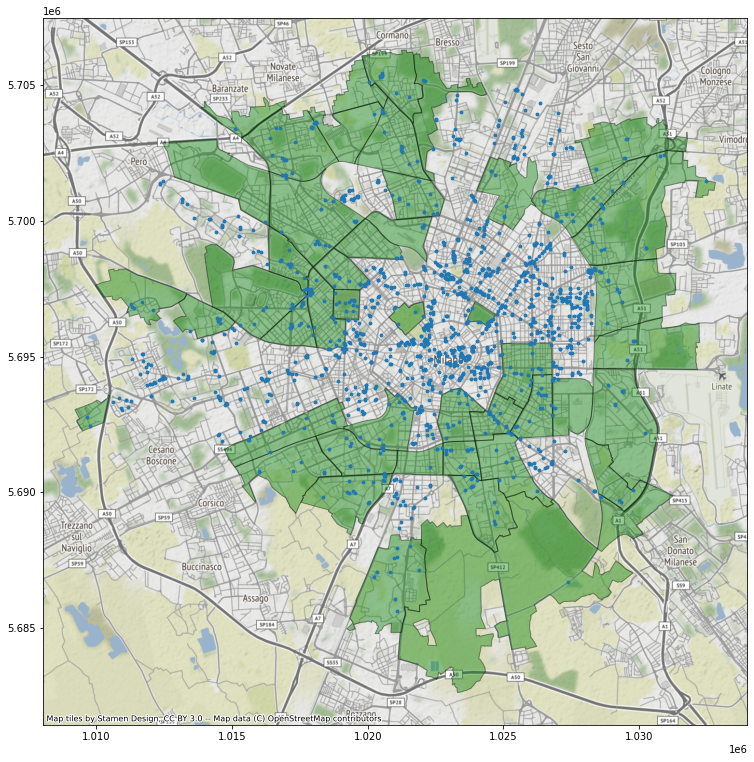

In [ ]:
ax = merge_quar_min_mean.to_crs(epsg=3857).plot(figsize=(15,13), facecolor= "Green", alpha= 0.4, edgecolor= "k")
bike_areesosta.to_crs(epsg=3857).plot(ax=ax, markersize = 8)
contextily.add_basemap(ax)

- una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;

- una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;